In [5]:
import numpy as np
import pandas as pd
import pylab as plt

plt.rc('figure',figsize=(10,5))
size_subplot = (10,10)
bin_size = 10

In [8]:
df_t = pd.read_csv('Titanic-Dataset (2).csv')

In [ ]:
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_t.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df_t.shape

(891, 12)

##**information viewer**

In [11]:
df_t.dtypes #check the datatype


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [12]:
df_t.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##**From above result we can observe that there are some null values in the age column**

In [13]:
survived_count = df_t['Survived'].value_counts()
print(survived_count)

Survived
0    549
1    342
Name: count, dtype: int64


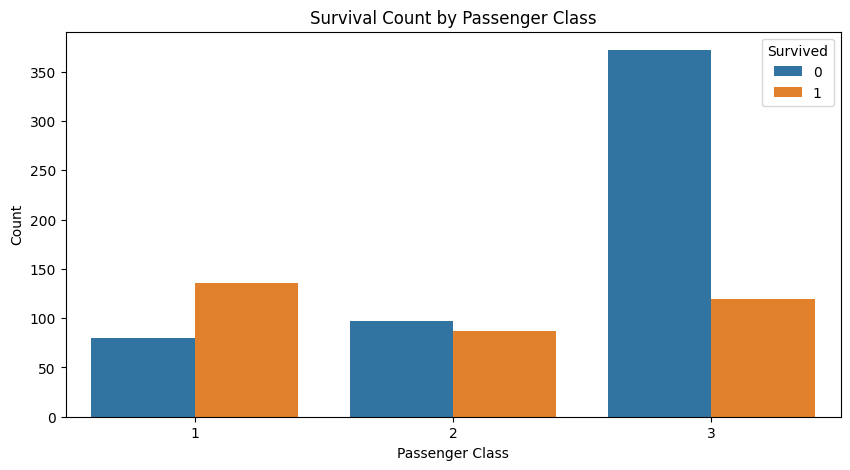

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_t'
sns.countplot(x='Pclass', hue='Survived', data=df_t)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

##**To check the survival rate of male and female we will convert it in to interger type**

In [15]:
df_t['Sex'] = df_t['Sex'].map({'female': 0, 'male': 1})

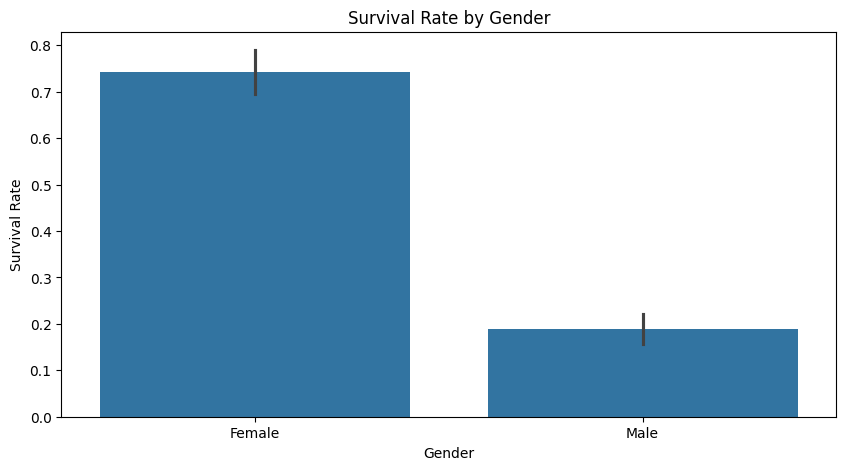

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_t' and 'Sex' column is already mapped to 0 and 1
sns.barplot(x='Sex', y='Survived', data=df_t)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
# Set x-axis tick labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

##**Now we know that the age column has few null values ,so either we can remove it or clean it and use,so here we are cleaning the age column and filling the null with the mean values**

In [17]:
mean_age = df_t['Age'].mean()

In [18]:
df_t['Age'].fillna(mean_age, inplace=True)

In [19]:
df_t.dropna(subset=['Age'], inplace=True)

In [20]:
import pandas as pd

# Assuming you have already loaded your DataFrame as 'df_t'

# Create the 'AgeGroup' column
df_t['AgeGroup'] = pd.cut(df_t['Age'], bins=[1, 39, 59, df_t['Age'].max()], labels=['Young', 'Middle-Aged', 'Old'], include_lowest=True)

# Print the 'AgeGroup' column
print(df_t['AgeGroup'])

0      Young
1      Young
2      Young
3      Young
4      Young
       ...  
886    Young
887    Young
888    Young
889    Young
890    Young
Name: AgeGroup, Length: 891, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']


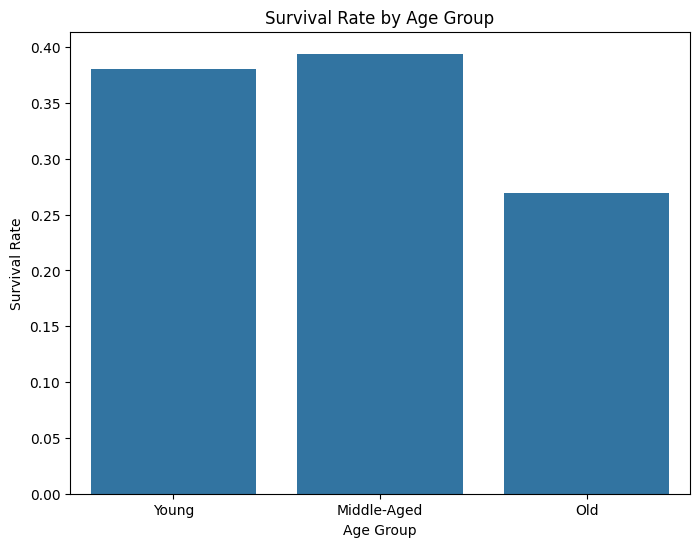

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created the 'AgeGroup' column in your DataFrame 'df_t'

# Calculate survival rate for each age group
survival_rate_by_age_group = df_t.groupby('AgeGroup')['Survived'].mean()

# Create the graph
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_age_group.index, y=survival_rate_by_age_group.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

##**Model training**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have already loaded your DataFrame as 'df_t' and converted 'Sex' to numerical (0 for female, 1 for male)

# Select features and target variable
features = ['Pclass', 'Sex']
target = 'Survived'
X = df_t[features]
y = df_t[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7821229050279329


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
df_t = pd.read_csv('Titanic-Dataset (2).csv')

# Preprocessing steps (from your original code, excluding Age)
df_t['Sex'] = df_t['Sex'].map({'female': 0, 'male': 1})

# Select features and target variable (excluding Age)
features = ['Pclass', 'Sex']  # Removed 'Age' from features
target = 'Survived'
X = df_t[features]
y = df_t[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without Age column (Decision Tree): {accuracy}")

# Function to make predictions
def predict_survival_dt(pclass, sex):
    """Predicts survival based on passenger class and sex using Decision Tree.

    Args:
        pclass: Passenger class (1, 2, or 3).
        sex: Sex (0 for female, 1 for male).

    Returns:
        Survival prediction (0 or 1).
    """
    input_data = pd.DataFrame([[pclass, sex]], columns=features)
    prediction = model.predict(input_data)[0]
    return prediction

# Example usage
pclass = 1
sex = 0
prediction = predict_survival_dt(pclass, sex)

print(f"Prediction for a passenger in Pclass {pclass}, Sex {sex}: {prediction}")

Accuracy without Age column (Decision Tree): 0.7653631284916201
Prediction for a passenger in Pclass 1, Sex 0: 1


##**with this we conclude that the accuracy is better when age is included**

In [26]:
# ... (code for training the Logistic Regression model)

# Function to make predictions
def predict_survival(pclass, sex):
    """Predicts survival based on passenger class and sex.

    Args:
        pclass: Passenger class (1, 2, or 3).
        sex: Sex (0 for female, 1 for male).

    Returns:
        Survival prediction (0 or 1).
    """
    input_data = pd.DataFrame([[pclass, sex]], columns=['Pclass', 'Sex'])
    prediction = model.predict(input_data)[0]
    return prediction

# Example usage for Pclass 2:
pclass = 2  # Passenger in 2nd class
sex = 0    # Example: Female passenger
prediction = predict_survival(pclass, sex)
print(f"Prediction for a passenger in Pclass {pclass}, Sex {sex}: {prediction}")

sex = 1    # Example: Male passenger
prediction = predict_survival(pclass, sex)
print(f"Prediction for a passenger in Pclass {pclass}, Sex {sex}: {prediction}")

Prediction for a passenger in Pclass 2, Sex 0: 1
Prediction for a passenger in Pclass 2, Sex 1: 0


In [27]:
# ... (code for training the Logistic Regression model)

# Function to make predictions
def predict_survival(pclass, sex):
    """Predicts survival based on passenger class and sex.

    Args:
        pclass: Passenger class (1, 2, or 3).
        sex: Sex (0 for female, 1 for male).

    Returns:
        Survival prediction (0 or 1).
    """
    input_data = pd.DataFrame([[pclass, sex]], columns=['Pclass', 'Sex'])
    prediction = model.predict(input_data)[0]
    return prediction

# Example usage:
pclass = 3  # Example: Passenger in 3rd class
sex = 1    # Example: Male passenger
prediction = predict_survival(pclass, sex)
print(f"Prediction for a passenger in Pclass {pclass}, Sex {sex}: {prediction}")

Prediction for a passenger in Pclass 3, Sex 1: 0


In [28]:
# ... (code for training the Decision Tree model)

# Function to make predictions
def predict_survival_dt(pclass, sex):
    """Predicts survival based on passenger class and sex using Decision Tree.

    Args:
        pclass: Passenger class (1, 2, or 3).
        sex: Sex (0 for female, 1 for male).

    Returns:
        Survival prediction (0 or 1).
    """
    input_data = pd.DataFrame([[pclass, sex]], columns=['Pclass', 'Sex'])
    prediction = model.predict(input_data)[0]
    return prediction

# Example usage:
pclass = 1  # Example: Passenger in 1st class
sex = 0    # Example: Female passenger
prediction = predict_survival_dt(pclass, sex)
print(f"Prediction for a passenger in Pclass {pclass}, Sex {sex}: {prediction}")

Prediction for a passenger in Pclass 1, Sex 0: 1


In [29]:
from sklearn.metrics import accuracy_score

# ... (code for training and making predictions)

accuracy = accuracy_score(y_test, y_pred)  # y_test: actual labels, y_pred: predicted labels
print(f"Accuracy: {accuracy}")


Accuracy: 0.7821229050279329


In [35]:
import warnings
warnings.filterwarnings("ignore")

# ... (Your existing code for importing libraries and data)

# Train the model and assign it to 'log'
log = LogisticRegression()
log.fit(X_train, y_train)

# Make prediction
res = log.predict([[2,1]])

# Print the prediction
if res[0] == 0:
    print("So sorry! Not survived")
else:
    print("Survived!")

So sorry! Not survived
